## Step 0: Read Files

In [ ]:
# read data
import pandas as pd

df_ptt = pd.read_csv("bda2025_202301-202503_討論數據_ptt.csv", encoding="utf-8")
df_dcard1 = pd.read_csv("bda2025_202301-202503_討論數據_dcard_1.csv", encoding="utf-8")
df_dcard2 = pd.read_csv("bda2025_202301-202503_討論數據_dcard_2.csv", encoding="utf-8")
df_mobile = pd.read_csv("bda2025_202301-202503_討論數據_mobile01.csv", encoding="utf-8")
df_news = pd.read_csv("bda2025_202301-202503_內容數據_新聞.csv", encoding="utf-8")
df_listed_dict = pd.read_excel("bda2025_stock_202301-202503_上市.xlsx", sheet_name=None)
df_OTC = pd.read_excel("bda2025_stock_202301-202503_上櫃.xlsx")

In [3]:
listed_list = []

for df in df_listed_dict.values():
    listed_list.append(df)

df_listed = pd.concat(listed_list, ignore_index=True)
df_listed

,代號,名稱,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
0,0050,元大台灣50,2023/06/30,121.7400,122.0236,121.2674,122.0236,7504,964915,0.0387,...,3.4082,0.05,0.6199,129.10,142.00,116.20,NaN,NaN,NaN,TSE
1,0051,元大中型100,2023/06/30,61.9155,62.1026,61.8688,62.0558,203,13462,0.3023,...,3.6172,0.20,0.3779,66.35,72.95,59.75,NaN,NaN,NaN,TSE
2,0052,富邦科技,2023/06/30,110.2080,111.4560,109.9680,111.4560,95,10974,0.5630,...,3.4453,0.65,1.3426,116.10,127.70,104.50,NaN,NaN,NaN,TSE
3,0053,元大電子,2023/06/30,63.3886,63.7224,63.3886,63.7224,3,211,0.5267,...,2.5599,0.35,0.5267,66.80,73.45,60.15,NaN,NaN,NaN,TSE
4,0055,元大MSCI金融,2023/06/30,21.7009,21.7383,21.6448,21.6728,95,2210,-0.1293,...,3.7549,-0.03,0.4310,23.17,25.48,20.86,NaN,NaN,NaN,TSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763822,Y8886,未含金電,2025/01/02,14213.4700,14311.6000,14183.3400,14216.0900,1057906,79630084,0.0234,...,3.0885,3.32,0.9024,NaN,NaN,NaN,NaN,NaN,NaN,TSE
763823,Y8887,TR未金電,2025/01/02,NaN,NaN,NaN,32572.3200,1057906,79630084,0.0233,...,3.0885,7.60,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,TSE
763824,Y8888,不含金融,2025/01/02,20072.5600,20133.9300,19825.4500,19931.9200,2612064,325006568,-0.9846,...,2.3587,-198.21,1.5324,NaN,NaN,NaN,NaN,NaN,NaN,TSE
763825,Y9997,報酬指數,2025/01/02,50804.1100,50942.0100,50224.5900,50486.4600,6901476,379129283,-0.8187,...,2.4561,-416.77,1.4094,NaN,NaN,NaN,NaN,NaN,NaN,TSE


In [4]:
print(df_ptt.columns)
print(df_dcard1.columns)
print(df_dcard2.columns)
print(df_mobile.columns)
print(df_news.columns)

Index(['id', 'p_type', 's_name', 's_area_name', 'post_time', 'title', 'author',
       'content', 'page_url'],
      dtype='object')
Index(['id', 'p_type', 's_name', 's_area_name', 'post_time', 'title', 'author',
       'content', 'page_url', 'content_type'],
      dtype='object')
Index(['id', 'p_type', 's_name', 's_area_name', 'post_time', 'title', 'author',
       'content', 'page_url', 'content_type'],
      dtype='object')
Index(['id', 'p_type', 's_name', 's_area_name', 'post_time', 'title', 'author',
       'content', 'page_url', 'content_type'],
      dtype='object')
Index(['id', 'p_type', 's_name', 's_area_name', 'post_time', 'title', 'author',
       'content', 'page_url'],
      dtype='object')


## Step 1: 先選出要預測的股票標的
- 篩選條件：股價波動大的股票
- 篩選方式：不知道他報酬率怎麼算出來的，但就是找出 Variance 報酬率最大的股票

### 1.1 找出股票波動最大的前50檔股票

In [5]:
variance_by_stock = df_listed.groupby("名稱")["報酬率％"].var().sort_values(ascending=False)

top50 = variance_by_stock.head(50)
for stock, variance in top50.items():
    stock = stock.strip()
    print(f"股票: {stock:7}", end="")
    print(f"報酬率變異數: {variance:.2f}")

stock_lists = []

for stock in top50.index:
    stock = stock.strip()
    stock_lists.append(stock)

股票: 三集瑞-KY 報酬率變異數: 118.14
股票: 裕慶-KY  報酬率變異數: 98.10
股票: 來億-KY  報酬率變異數: 94.47
股票: 龍德造船   報酬率變異數: 85.60
股票: AMAX-KY報酬率變異數: 83.21
股票: 永道-KY  報酬率變異數: 53.40
股票: ITH-KY 報酬率變異數: 50.09
股票: 華懋     報酬率變異數: 47.40
股票: 天虹     報酬率變異數: 38.04
股票: 星宇航空   報酬率變異數: 37.11
股票: 望隼     報酬率變異數: 35.65
股票: 富威電力   報酬率變異數: 32.56
股票: 富世達    報酬率變異數: 28.16
股票: 玖鼎電力   報酬率變異數: 26.18
股票: 虎山     報酬率變異數: 25.37
股票: 六方科-KY 報酬率變異數: 24.72
股票: 現觀科    報酬率變異數: 22.82
股票: 達運光電   報酬率變異數: 22.00
股票: 聯策     報酬率變異數: 21.09
股票: 青松健康   報酬率變異數: 19.86
股票: 睿生光電   報酬率變異數: 19.84
股票: 有成精密   報酬率變異數: 18.34
股票: 攸泰科技   報酬率變異數: 17.86
股票: 光聖     報酬率變異數: 17.78
股票: 華城     報酬率變異數: 16.83
股票: 銘旺科    報酬率變異數: 16.64
股票: 晟銘電    報酬率變異數: 16.41
股票: 迎廣     報酬率變異數: 16.23
股票: 康霈*    報酬率變異數: 16.17
股票: 金興精密   報酬率變異數: 16.09
股票: 阜爾運通   報酬率變異數: 15.68
股票: 華安     報酬率變異數: 14.49
股票: 麗臺     報酬率變異數: 14.22
股票: 高力     報酬率變異數: 14.04
股票: 訊芯-KY  報酬率變異數: 13.97
股票: 慧友     報酬率變異數: 13.64
股票: 世芯-KY  報酬率變異數: 13.54
股票: 皇昌     報酬率變異數: 13.36
股票: 威盛     報酬率變異數: 13.22
股票: 波力-KY  報酬率變異數: 13.07

### 1.2 再算出這五十檔股票的 term-frequency

In [6]:
import pandas as pd

class Source:
    def __init__(self, name, df):
        self.name = name
        self.df = df

class Company:
    def __init__(self, name):
        self.name = name

    def count_mentions_in(self, source):
        count = 0
        for content in source.df["content"]:
            if isinstance(content, str) and (self.name in content):
                count += 1
        return count

# Create source and company objects
sources = [
    Source("PTT", df_ptt),
    Source("Dcard1", df_dcard1),
    Source("Dcard2", df_dcard2),
    Source("Mobile01", df_mobile),
    Source("News", df_news)
]

companies = [Company(name) for name in stock_lists]

# Build a list of dicts (rows)
test_data = []
for company in companies:
    row = {"公司": company.name}
    total = 0
    for source in sources:
        count = company.count_mentions_in(source)
        row[source.name] = count
        total += count
    row["總計"] = total
    test_data.append(row)

summary_df = pd.DataFrame(test_data)
summary_df.sort_values(by="總計", ascending=False, inplace=True)

# drop=Ture 會讓原本的 index 消掉，不然就會有兩欄 index
summary_df.reset_index(drop=False, inplace=True, names="old")
summary_df

,old,公司,PTT,Dcard1,Dcard2,Mobile01,News,總計
0,45,創意,998,119,159,31,7004,8311
1,43,緯穎,831,91,187,6,4803,5918
2,36,世芯-KY,781,37,123,7,4252,5200
3,41,奇鋐,1120,101,179,4,3671,5075
4,24,華城,908,78,174,7,3220,4387
5,49,祥碩,322,30,111,1,2008,2472
6,46,勤誠,394,59,45,1,1619,2118
7,40,聯鈞,579,16,174,0,1234,2003
8,38,威盛,535,104,39,3,1232,1913
9,26,晟銘電,523,47,83,1,1192,1846


## Step 2：Data Processing

### Step 2.1 從五個文章來源，篩選出所有 title, content 包含 company name 的文章 id 並存成一個 list

In [7]:
def get_fileID_contain_companyname(companyname) -> list:
    # 先篩出包含公司名稱的資料 ID
    fileID_contain_companyname = []

    for source in sources:
        for id, title, content in zip(source.df['id'], source.df["title"], source.df["content"]):
            if isinstance(title, str) and isinstance(content, str):
                title = title.strip()
                content = content.strip()
                if (companyname in title) or (companyname in content):
                    fileID_contain_companyname.append(id)
    
    if len(fileID_contain_companyname) == 0:
        print(f"沒有包含 {companyname} 的資料 ID")
        raise Exception(f"沒有包含 {companyname} 的資料 ID")
                
    return fileID_contain_companyname

In [8]:
fileID_contain_companyname = get_fileID_contain_companyname("龍德造船")
print(fileID_contain_companyname)

['1678063187724_PTT02R', '1678246199548_PTT02R', '1678839412112_PTT02R', '1678840307061_PTT02R', '1679047950014_PTT02R', '1679142671637_PTT02R', '1679983265966_PTT02R', '1679991217391_PTT02R', '1679998663870_PTT02R', '1680851794815_PTT02R', '1680854765619_PTT02R', '1681034003974_PTT02R', '1681099929868_PTT02R', '1681797747889_PTT02R', '1682062709166_PTT02R', '1682239492693_PTT02R', '1682865865176_PTT02R', '1688022418193_PTT02R', '1691900348809_PTT02R', '1692764322055_PTT02R', '1694755081857_PTT02R', '1702159720091_PTT02R', '1705723747782_PTT02R', '1710498161710_PTT02R', '1711109633685_PTT02R', '1711374263848_PTT02R', '1711428133770_PTT02R', '1711516920282_PTT02R', '1711540285922_PTT02R', '1712152222987_PTT02R', '1713440859037_PTT02R', '1713458922300_PTT02R', '1713538789957_PTT02R', '1713761289122_PTT02R', '1714970302132_PTT02R', '1715143095906_PTT02R', '1715332849350_PTT02R', '1715685038289_PTT02R', '1715694221176_PTT02R', '1715788156738_PTT02R', '1718261656806_PTT02R', '1718794218564_

### Step 2.2 清理 dataframe

In [9]:
def create_cleaned_df(fileID_contain_companyname, companyname) -> pd.DataFrame:
    import os
    if os.path.exists(f"cleaned_df_{companyname}.csv"):
        return pd.read_csv(f"cleaned_data/cleaned_data_{companyname}.csv", encoding="utf-8-sig")


    # 按照 ID 製作新的 dataframe
    cleaned_ppt_df = df_ptt[df_ptt["id"].isin(fileID_contain_companyname)].copy()
    cleaned_dcard1_df = df_dcard1[df_dcard1["id"].isin(fileID_contain_companyname)].drop(columns=["content_type"]).copy()
    cleaned_dcard2_df = df_dcard2[df_dcard2["id"].isin(fileID_contain_companyname)].drop(columns=["content_type"]).copy()
    cleaned_mobile_df = df_mobile[df_mobile["id"].isin(fileID_contain_companyname)].drop(columns=["content_type"]).copy()
    cleaned_news_df = df_news[df_news["id"].isin(fileID_contain_companyname)].copy()
    cleaned_ppt_df['source'] = 'PTT'
    cleaned_dcard1_df['source'] = 'Dcard1'
    cleaned_dcard2_df['source'] = 'Dcard2'
    cleaned_mobile_df['source'] = 'Mobile01'
    cleaned_news_df['source'] = 'News'
    cleaned_df = pd.concat([cleaned_ppt_df, cleaned_dcard1_df, cleaned_dcard2_df, cleaned_mobile_df, cleaned_news_df], ignore_index=True)

    import re
    # 清除 title, content 中的表點符號、英文、數字；將日期轉換格式
    def clean_text(text):
        """Remove punctuation, English letters, and digits"""
        text = re.sub(r"[^\u4e00-\u9fa5]", "", text)
        return text
    
    cleaned_df["title"] = cleaned_df["title"].apply(clean_text)
    cleaned_df["content"] = cleaned_df["content"].apply(clean_text)

    def clean_time(time):
        time = time.split(" ")
        return time[0]

    # 將時間去掉小時、分鐘、秒只留下日期
    try:
        cleaned_df["post_time"] = cleaned_df["post_time"].apply(clean_time)
    except:
        pass

    # 將 "post_time" 也轉換為 datetime 格式
    cleaned_df["post_time"] = pd.to_datetime(cleaned_df["post_time"], format="%Y-%m-%d")
    # 新增一欄 "mark"，預設為 0
    cleaned_df['mark'] = 0

    cleaned_df.to_csv(f"cleaned_data/cleaned_data_{companyname}.csv", index=False, encoding="utf-8-sig")
    
    return cleaned_df

In [10]:
cleaned_df = create_cleaned_df(fileID_contain_companyname, companyname="龍德造船")
cleaned_df

,id,p_type,s_name,s_area_name,post_time,title,author,content,page_url,source,mark
0,1678063187724_PTT02R,bbs,Ptt,Stock,2023-03-06,新聞龍德造船長榮航太永豐金抽籤再現熱潮,ej03xu3,原文標題三炮齊發新股抽籤再現熱潮原文連結發布時間年月日週一記者署名工商時報鄭郁平原文內容台股...,http://www.ptt.cc/bbs/Stock/M.1678063065.A.BDE...,PTT,0
1,1678246199548_PTT02R,bbs,Ptt,Stock,2023-03-08,新聞長榮航太也槓龜錢存起來抽這檔月薪,TT991,原文標題長榮航太也槓龜錢存起來抽這檔月薪躺著賺原文連結發布時間年月日週三上午記者署名龍彩霖原...,http://www.ptt.cc/bbs/Stock/M.1678246071.A.0FF...,PTT,0
2,1678839412112_PTT02R,bbs,Ptt,Stock,2023-03-15,新聞詐團騙中張龍德造船新股老翁險匯萬,starport,詐團騙中張龍德造船新股老翁險匯萬遭警阻高華謙詐騙集團看準原興櫃股龍德造船公開申購期間湧現買氣...,http://www.ptt.cc/bbs/Stock/M.1678839307.A.215...,PTT,0
3,1678840307061_PTT02R,bbs,Ptt,Stock,2023-03-15,新聞睿生光電申購今登場中籤者現賺於萬,ej03xu3,原文標題蜜月行情超甜新股抽籤熱再起原文連結發布時間記者署名工商時報鄭郁平原文內容新股抽抽樂再...,http://www.ptt.cc/bbs/Stock/M.1678840115.A.B9B...,PTT,0
4,1679047950014_PTT02R,bbs,Ptt,Stock,2023-03-17,情報八大公股銀行買賣超排行,q1a1,標題八大公股銀行買賣超排行來源玩股網網址內文以下資訊依張數排列買超賣超排名股票張數排名股票張...,http://www.ptt.cc/bbs/Stock/M.1679047835.A.285...,PTT,0
...,...,...,...,...,...,...,...,...,...,...,...
744,1737678910949_YahooStock,news,Yahoo股市,財經新聞,2025-01-24,熱門族群川普帶動國防支出航太軍工熱,時報資訊,時報台北電隨著川普的時代到來日本南韓澳洲印度台灣等環太平洋國家緊繃的神經再度拴緊回顧年川普上...,https://tw.stock.yahoo.com/news/%E7%86%B1%E9%9...,News,0
745,1739174274749_YahooStock,news,Yahoo股市,財經新聞,2025-02-10,公告龍德造船年月合併營收億元年增,中央社,日期年月日上市公司龍德造船單位仟元公告龍德造船年月合併營收單位仟元項目合併營業收入淨額本月去...,https://tw.stock.yahoo.com/news/%E5%85%AC%E5%9...,News,0
746,1739517652218_YahooStock,news,Yahoo股市,財經新聞,2025-02-14,台北股市川普搞破壞外資揮今年第六大刀三大法人砍億,時報資訊,時報台北電川普投顧又來亂再提晶片關稅政策衝擊台股重挫點月線警鈴大作今日三大法人同步作空外資不...,https://tw.stock.yahoo.com/news/%E5%8F%B0%E5%8...,News,0
747,1739828103962_YahooStock,news,Yahoo股市,財經新聞,2025-02-18,勇鷹高教機失事漢翔面臨營運陣痛期,劉朱松／台中報導,勇鷹高教機失事利空衝擊漢翔股價漢翔日回應肇因調查由空軍主導漢翔全力配合辦理有外界指稱位於岡山...,https://tw.stock.yahoo.com/news/%E5%8B%87%E9%B...,News,0


### Step 2.3.1 將文章標記成看漲文章或是看跌文章

In [11]:
def create_df_listed_selected(df_listed, companyname):
    # 先將 "年月日" 轉換為 datetime 格式
    df_listed_selected = df_listed[df_listed["名稱"] == companyname]
    df_listed_selected = df_listed_selected[["年月日", "報酬率％"]]
    df_listed_selected["年月日"] = pd.to_datetime(df_listed_selected["年月日"], format="%Y/%m/%d")
    return df_listed_selected

In [12]:
def update_mark(cleaned_df, df_listed_selected):
    for idx, (date, mark) in enumerate(zip(cleaned_df['post_time'], cleaned_df['mark'])):
        row = df_listed_selected[df_listed_selected['年月日'] == date]
        
        if row.empty:
            continue
        
        new_mark = int(row['報酬率％'].values[0] > 0)
        
        cleaned_df.loc[idx, 'mark'] = new_mark

    return cleaned_df

### Step 2.4.1 用 term frequency 抓出 keyword

In [13]:
def get_keywords(cleaned_df, keywordnum, companyname) -> list:
    import os
    import pandas as pd
    from collections import Counter
    from tqdm import tqdm

    # 檢查是否已經存在關鍵字檔案
    if os.path.exists(f"keywords/{keywordnum}Keywordsof_{companyname}.csv"):
        return pd.read_csv(f"keywords/{keywordnum}Keywordsof_{companyname}.csv", encoding="utf-8-sig")["word"].tolist()

    def char_tokenize(text):
        return list(text)

    def generate_ngrams(tokens, n):
        for i in range(len(tokens) - n + 1):
            yield ''.join(tokens[i : i + n])

    # Initialize Counter
    ngram_counter = Counter()

    # tqdm progress bar on content rows
    for content in tqdm(cleaned_df["content"].dropna().astype(str), desc="Processing N-grams"):
        tokens = char_tokenize(content)
        for n in [2, 3, 4]:
            ngram_counter.update(generate_ngrams(tokens, n))

    # Create DataFrame from Counter
    frequencies_df = pd.DataFrame(ngram_counter.items(), columns=["word", "term_frequency"])
    frequencies_df.sort_values(by="term_frequency", ascending=False, inplace=True)
    frequencies_df.reset_index(drop=True, inplace=True)

    # Save and return top keywords
    output_path = f"keywords/{keywordnum}Keywordsof_{companyname}.csv"
    frequencies_df.head(keywordnum).to_csv(output_path, index=False, encoding="utf-8-sig")

    return frequencies_df.head(keywordnum)["word"].tolist()

### Step 2.4.2 用 TFIDF 抓出 keyword

In [14]:
#TF-IDF
def get_keywords_tfidf(cleaned_df, keywordnum, companyname) -> list:
    import os
    import pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer

    # 檢查是否已經存在 TF-IDF 檔案
    if os.path.exists(f"keywords/{keywordnum}TFIDFKeywordsof_{companyname}.csv"):
        return pd.read_csv(f"keywords/{keywordnum}TFIDFKeywordsof_{companyname}.csv", encoding="utf-8-sig")["word"].tolist()

    # Prepare the corpus
    corpus = cleaned_df["content"].dropna().astype(str).tolist()

    # Initialize TfidfVectorizer with char-level 2~4 grams
    vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(2, 4))
    X = vectorizer.fit_transform(corpus)  # Returns a sparse matrix

    # Get feature names and their max TF-IDF score across all documents
    feature_names = vectorizer.get_feature_names_out()
    max_tfidf_scores = X.max(axis=0).toarray().flatten()

    tfidf_df = pd.DataFrame({
        "word": feature_names,
        "tfidf": max_tfidf_scores
    })

    tfidf_df.sort_values(by="tfidf", ascending=False, inplace=True)
    tfidf_df.reset_index(drop=True, inplace=True)

    # Save and return top N keywords
    tfidf_df.head(keywordnum).to_csv(f"keywords/{keywordnum}TFIDFKeywordsof_{companyname}.csv", index=False, encoding="utf-8-sig")
    return tfidf_df.head(keywordnum)["word"].tolist()

### Step 2.4.3 用 Lift 抓出 keyword

In [24]:
def get_keywords_lift(cleaned_df, keywordnum, companyname) -> list:
    import os
    import pandas as pd
    from collections import Counter
    from sklearn.feature_extraction.text import CountVectorizer

    # 檢查是否已經存在 Lift 檔案
    if os.path.exists(f"keywords/{keywordnum}LiftKeywordsof_{companyname}.csv"):
        return pd.read_csv(f"keywords/{keywordnum}LiftKeywordsof_{companyname}.csv", encoding="utf-8-sig")["word"].tolist()

    # Prepare corpus and labels
    cleaned_df = cleaned_df.dropna(subset=["content"])
    corpus_all = cleaned_df["content"].astype(str).tolist()
    corpus_pos = cleaned_df[cleaned_df["mark"] == 1]["content"].astype(str).tolist()

    # Use CountVectorizer with char n-grams
    vectorizer = CountVectorizer(analyzer="char", ngram_range=(2, 4))
    X_all = vectorizer.fit_transform(corpus_all)
    X_pos = vectorizer.transform(corpus_pos)

    # Compute term frequencies
    word_counts_all = X_all.sum(axis=0).A1
    word_counts_pos = X_pos.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()

    total_all = word_counts_all.sum()
    total_pos = word_counts_pos.sum()

    # Compute lift = P(w | pos) / P(w)
    lift_scores = (word_counts_pos / total_pos) / (word_counts_all / total_all)

    lift_df = pd.DataFrame({
        "word": vocab,
        "lift": lift_scores
    })

    lift_df.sort_values(by="lift", ascending=False, inplace=True)
    lift_df.reset_index(drop=True, inplace=True)

    # Save and return top N keywords
    lift_df.head(keywordnum).to_csv(f"keywords/{keywordnum}LiftKeywordsof_{companyname}.csv", index=False, encoding="utf-8-sig")
    return lift_df.head(keywordnum)["word"].tolist()

### Step 2.5 建構向量空間 final data
針對每篇文章，計算不同關鍵字出現的次數


In [61]:
from typing import Literal
def create_final_data(cleaned_df, key_words, companyname, keyword_method, method: Literal["count", "contain"] = "count") -> pd.DataFrame:
    import pandas as pd
    from tqdm import tqdm

    # Step 1: Copy essential columns
    df = cleaned_df[["id", "post_time", "mark"]].copy()

    # Step 2: Initialize all keyword columns at once with 0s
    zeros_df = pd.DataFrame(0, index=df.index, columns=key_words)
    df = pd.concat([df, zeros_df], axis=1)

    # Step 3: Only operate on rows where content is a string
    valid_content = cleaned_df["content"].fillna("")

    # Step 4: Vectorized keyword counting
    if method == "count":
        for key in tqdm(key_words, desc="Counting keywords"):
            df[key] = valid_content.str.count(key)
    elif method == "contain":
        for key in tqdm(key_words, desc="Checking keyword containment"):
            df[key] = valid_content.str.contains(key).astype(int)
    
    df.to_csv(f"finaldata/final_data_{method}_{keyword_method}_{len(key_words)}_{companyname}.csv", index=False, encoding="utf-8-sig")

    return df

## Step 3: 模型建置

In [17]:
# def run_models(df, run_PCA=True, PCA_n_components=100, test_size=0.2) -> dict:
#     from sklearn.model_selection import train_test_split
#     from sklearn.preprocessing import StandardScaler
#     from sklearn.naive_bayes import GaussianNB
#     from sklearn.neighbors import KNeighborsClassifier
#     from sklearn.svm import SVC
#     from sklearn.tree import DecisionTreeClassifier
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     # Example: Assume the target column is named 'target'
#     X = df.drop(['mark', 'id', 'post_time'], axis=1)  # Features
#     y = df['mark']              # Target

#     # 1. Split into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#     # Optional: Standardize features
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)


#     if run_PCA:
#         # Apply PCA
#         from sklearn.decomposition import PCA
#         pca = PCA(n_components=PCA_n_components)  # You can also try n_components=20 for a fixed value
#         X_train = pca.fit_transform(X_train)
#         X_test = pca.transform(X_test)

#         print(f"PCA reduced the feature count from {X.shape[1]} to {X_train.shape[1]}")

#     # 2. Initialize classifiers
#     models = {
#         'Naive Bayes': GaussianNB(),
#         'KNN': KNeighborsClassifier(n_neighbors=5),
#         'SVM': SVC(),
#         'Decision Tree': DecisionTreeClassifier(random_state=42),
#         'Random Forest': RandomForestClassifier(random_state=42)
#     }

#     # Store accuracy results
#     accuracies = {}

#     # 3. Train, evaluate, and plot confusion matrix
#     for name, model in models.items():
#         if name in ['KNN', 'SVM']:
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#         else:
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)

#         acc = accuracy_score(y_test, y_pred)
#         accuracies[name] = acc

        # print(f"\n{name} Classifier:")
        # print("Accuracy:", acc)
        # print(classification_report(y_test, y_pred))

        # # Confusion Matrix
        # cm = confusion_matrix(y_test, y_pred)
        # plt.figure(figsize=(6, 4))
        # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        # plt.title(f'{name} - Confusion Matrix')
        # plt.xlabel('Predicted')
        # plt.ylabel('Actual')
        # plt.tight_layout()
        # plt.show()

    # # 4. Accuracy Comparison Plot with labels
    # plt.figure(figsize=(8, 5))
    # ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))

    # # Add labels on top of bars
    # for i, bar in enumerate(ax.patches):
    #     height = bar.get_height()
    #     ax.text(
    #         bar.get_x() + bar.get_width() / 2,
    #         height + 0.02,  # slight offset above bar
    #         f'{height:.2f}',
    #         ha='center',
    #         va='bottom',
    #         fontsize=10
    #     )

    # plt.ylabel('Accuracy')
    # plt.title('Model Accuracy Comparison')
    # plt.ylim(0, 1.05)
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()

    # from scipy.stats import mode

    # # 5. Poll-Based Ensemble from KNN, SVM, Decision Tree, and Random Forest
    # # Ensure you have access to their predictions
    # poll_models = ['KNN', 'SVM', 'Decision Tree', 'Random Forest']
    # poll_preds = []

    # for name in poll_models:
    #     model = models[name]
    #     if name in ['KNN', 'SVM']:
    #         pred = model.predict(X_test)
    #     else:
    #         pred = model.predict(X_test)
    #     poll_preds.append(pred)
    
    # print("Poll predictions:", poll_preds)

    # # Stack predictions and take the mode (majority vote) along axis=0
    # import numpy as np
    # ensemble_preds = mode(np.array(poll_preds), axis=0, keepdims=False).mode[0]

    # print("Ensemble predictions:", ensemble_preds)

    # # Evaluate ensemble result
    # ensemble_acc = accuracy_score(y_test, y_pred=ensemble_preds)
    # accuracies['Poll-Based Ensemble'] = ensemble_acc

    # print("\nPoll-Based Ensemble Classifier:")
    # print("Accuracy:", ensemble_acc)
    # print(classification_report(y_test, ensemble_preds))

    # # Confusion Matrix for Ensemble
    # cm = confusion_matrix(y_test, ensemble_preds)
    # plt.figure(figsize=(6, 4))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title('Poll-Based Ensemble - Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.tight_layout()
    # plt.show()

    # # 6. Re-plot Accuracy Comparison with Ensemble included
    # plt.figure(figsize=(8, 5))
    # sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
    # plt.ylabel('Accuracy')
    # plt.title('Model Accuracy Comparison (with Poll-Based Ensemble)')
    # plt.ylim(0, 1)
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()

    # from sklearn.model_selection import cross_val_score
    # from sklearn.metrics import roc_curve, auc

    # # Prepare ROC plot
    # plt.figure(figsize=(8, 6))

    # for name, model in models.items():
    #     # Only for classifiers that support probability or decision scores
    #     if hasattr(model, "predict_proba"):
    #         if name in ['KNN', 'SVM']:
    #             probs = model.predict_proba(X_test)[:, 1]
    #         else:
    #             probs = model.predict_proba(X_test)[:, 1]
    #     elif hasattr(model, "decision_function"):
    #         if name == "SVM":
    #             probs = model.decision_function(X_test)
    #         else:
    #             continue  # skip if decision_function is not available
    #     else:
    #         continue  # skip models that can't produce scores

    #     # ROC curve
    #     fpr, tpr, _ = roc_curve(y_test, probs)
    #     roc_auc = auc(fpr, tpr)
    #     plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # # Plot formatting
    # plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    # plt.title('ROC Curve Comparison')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()

    # # Cross-Validation
    # print("\nCross-Validation Results (5-Fold):")
    # for name, model in models.items():
    #     if name in ['KNN', 'SVM']:
    #         X_cv = X_train
    #     else:
    #         X_cv = X_train
    #     scores = cross_val_score(model, X_cv, y_train, cv=5, scoring='accuracy')
    #     print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")
    
    # return accuracies

In [75]:
def run_models(df, run_PCA=True, PCA_n_components=100, test_size=0.2) -> dict:
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.decomposition import PCA
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 1. Prepare features and target
    X = df.drop(['mark', 'id', 'post_time'], axis=1)
    y = df['mark']

    # 2. Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    # 3. Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 4. PCA (optional)
    if run_PCA:
        pca = PCA(n_components=PCA_n_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        print(f"PCA reduced the feature count from {X.shape[1]} to {X_train.shape[1]}")

    # 5. Initialize models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'SVM': SVC(),
        'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
        'Random Forest': RandomForestClassifier(random_state=42, max_depth=10)
    }

    # 6. Evaluation results
    accuracies = {}

    for name, model in models.items():
        print(f"\n====== {name} ======")
        model.fit(X_train, y_train)

        # In-sample (training) predictions
        y_train_pred = model.predict(X_train)
        train_acc = accuracy_score(y_train, y_train_pred)
        print(f"[Train] Accuracy: {train_acc:.4f}")
        print("[Train] Classification Report:\n", classification_report(y_train, y_train_pred))

        # Out-of-sample (testing) predictions
        y_test_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)
        accuracies[name] = test_acc
        print(f"[Test] Accuracy: {test_acc:.4f}")
        print("[Test] Classification Report:\n", classification_report(y_test, y_test_pred))

        # Plot confusion matrices
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", ax=axes[0], cmap="Blues")
        axes[0].set_title(f"{name} - Train Confusion Matrix")
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")

        sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", ax=axes[1], cmap="Oranges")
        axes[1].set_title(f"{name} - Test Confusion Matrix")
        axes[1].set_xlabel("Predicted")
        axes[1].set_ylabel("Actual")

        plt.tight_layout()
        plt.show()

    return accuracies

## Step 4: 跑模型的主程式

In [70]:
from typing import Literal
def main(companyname, test_size=0.2, run_PCA=True, PCA_n_components=100, num_keywords=200, keyword_method: Literal["frequency", "tfidf", "lift"] = "tfidf", final_data_method: Literal["count", "contain"] = "count") -> dict:
    print(f"running models for {companyname}...")
    fileID_contain_companyname = get_fileID_contain_companyname(companyname)
    print("creating cleaned df...")
    cleaned_df = create_cleaned_df(fileID_contain_companyname, companyname)
    print("creating df_listed_selected...")
    df_listed_selected = create_df_listed_selected(df_listed, companyname)
    print("updating mark...")
    cleaned_df = update_mark(cleaned_df, df_listed_selected)
    print("creating keywords...")

    
    df_bull = cleaned_df[cleaned_df["mark"] == 1].copy()
    df_bear = cleaned_df[cleaned_df["mark"] == 0].copy()
    df_bull.reset_index(drop=True, inplace=True)
    df_bear.reset_index(drop=True, inplace=True)

    num_keywords = int(num_keywords / 2)
    bull_key_words = []
    bear_key_words = []


    if keyword_method == "frequency":
        bull_key_words = get_keywords(df_bull, num_keywords, companyname)
        bear_key_words = get_keywords(df_bear, num_keywords, companyname)
        key_words = list(set(bull_key_words + bear_key_words))
    elif keyword_method == "tfidf":
        bull_key_words = get_keywords_tfidf(df_bull, num_keywords, companyname)
        bear_key_words = get_keywords_tfidf(df_bear, num_keywords, companyname)
        key_words = list(set(bull_key_words + bear_key_words))
    elif keyword_method == "lift":
        bull_key_words = get_keywords_lift(df_bull, num_keywords, companyname)
        bear_key_words = get_keywords_lift(df_bear, num_keywords, companyname)
        key_words = list(set(bull_key_words + bear_key_words))
    
    print("creating final data...")
    df = create_final_data(cleaned_df, key_words, companyname, keyword_method, method=final_data_method)
    
    print("running models...")
    result = run_models(df, run_PCA=run_PCA, PCA_n_components=PCA_n_components, test_size=test_size)
    return result

num_keywords: 1000
running models for 夏都...
creating cleaned df...
creating df_listed_selected...
updating mark...
creating keywords...


Processing N-grams: 100%|██████████| 448/448 [00:00<00:00, 2580.19it/s]


creating final data...


Checking keyword containment: 100%|██████████| 500/500 [00:00<00:00, 2259.36it/s]


running models...
PCA reduced the feature count from 500 to 100

====== Logistic Regression ======
[Train] Accuracy: 0.7915
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       211
           1       0.85      0.82      0.84       403

    accuracy                           0.79       614
   macro avg       0.77      0.78      0.77       614
weighted avg       0.80      0.79      0.79       614

[Test] Accuracy: 0.6667
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.42      0.47        24
           1       0.72      0.80      0.76        45

    accuracy                           0.67        69
   macro avg       0.62      0.61      0.61        69
weighted avg       0.65      0.67      0.66        69



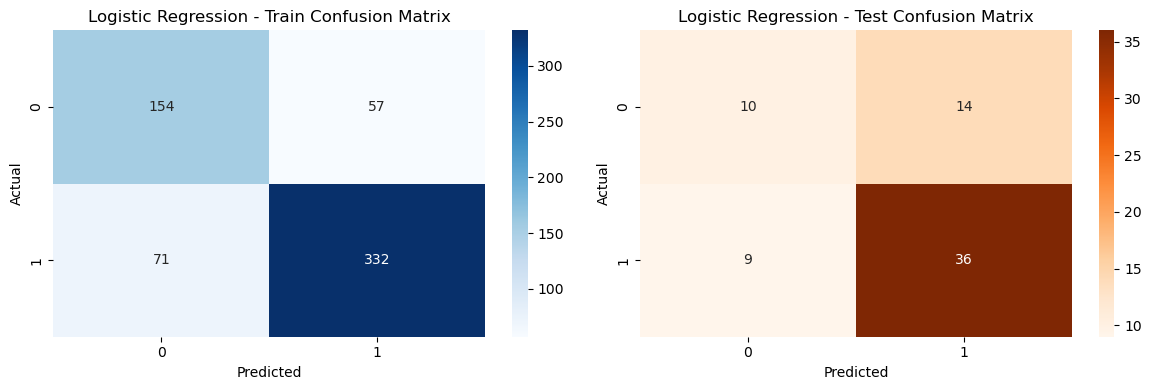


====== Naive Bayes ======
[Train] Accuracy: 0.6368
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.64      0.55       211
           1       0.77      0.63      0.70       403

    accuracy                           0.64       614
   macro avg       0.63      0.64      0.62       614
weighted avg       0.67      0.64      0.65       614

[Test] Accuracy: 0.6232
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.71      0.57        24
           1       0.79      0.58      0.67        45

    accuracy                           0.62        69
   macro avg       0.63      0.64      0.62        69
weighted avg       0.68      0.62      0.63        69



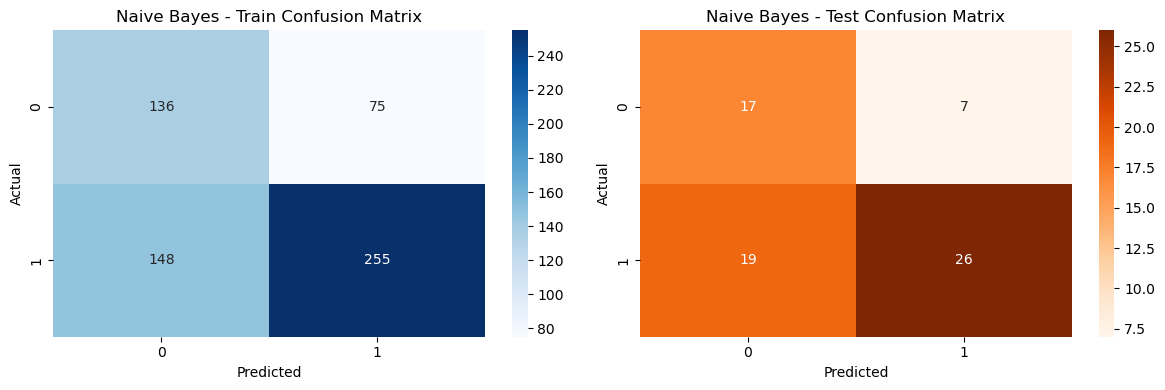


====== KNN ======
[Train] Accuracy: 0.7866
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.66       211
           1       0.81      0.88      0.84       403

    accuracy                           0.79       614
   macro avg       0.77      0.75      0.75       614
weighted avg       0.78      0.79      0.78       614

[Test] Accuracy: 0.6522
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43        24
           1       0.71      0.80      0.75        45

    accuracy                           0.65        69
   macro avg       0.60      0.59      0.59        69
weighted avg       0.63      0.65      0.64        69



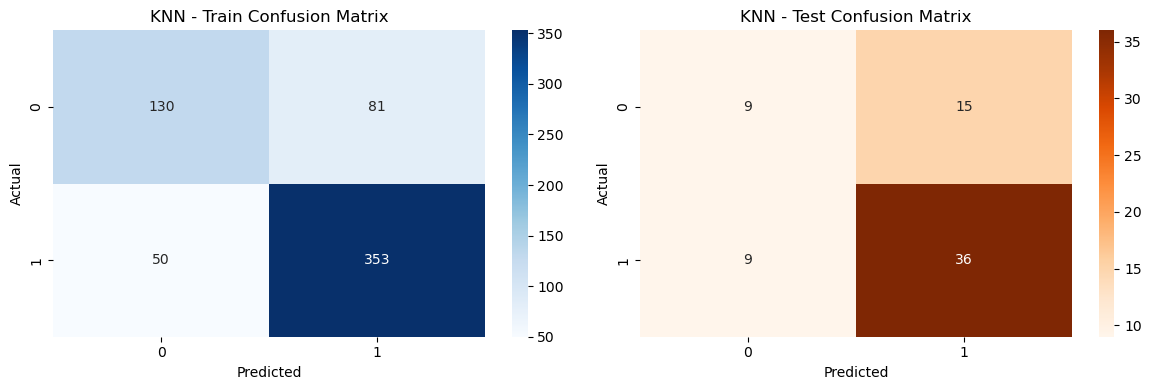


====== SVM ======
[Train] Accuracy: 0.8534
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       211
           1       0.91      0.87      0.89       403

    accuracy                           0.85       614
   macro avg       0.84      0.85      0.84       614
weighted avg       0.86      0.85      0.85       614

[Test] Accuracy: 0.7681
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        24
           1       0.84      0.80      0.82        45

    accuracy                           0.77        69
   macro avg       0.75      0.75      0.75        69
weighted avg       0.77      0.77      0.77        69



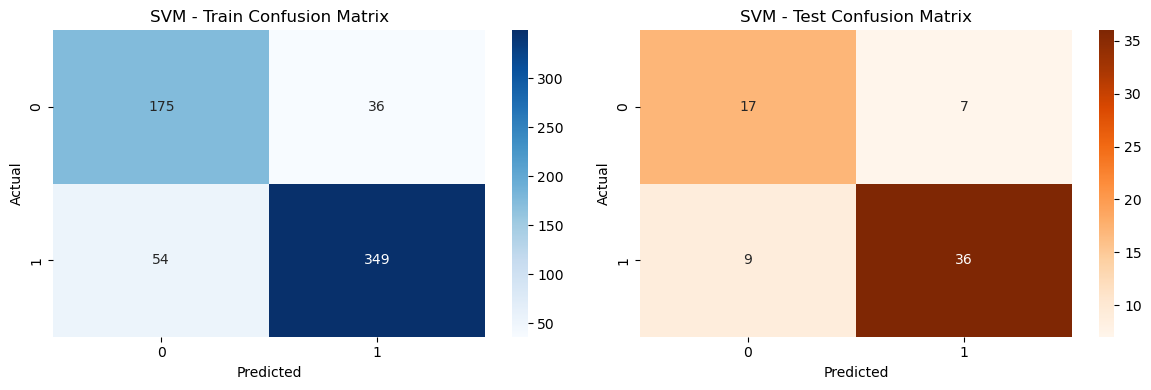


====== Decision Tree ======
[Train] Accuracy: 0.8078
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       211
           1       0.86      0.84      0.85       403

    accuracy                           0.81       614
   macro avg       0.79      0.79      0.79       614
weighted avg       0.81      0.81      0.81       614

[Test] Accuracy: 0.6087
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.54      0.49        24
           1       0.72      0.64      0.68        45

    accuracy                           0.61        69
   macro avg       0.59      0.59      0.59        69
weighted avg       0.63      0.61      0.62        69



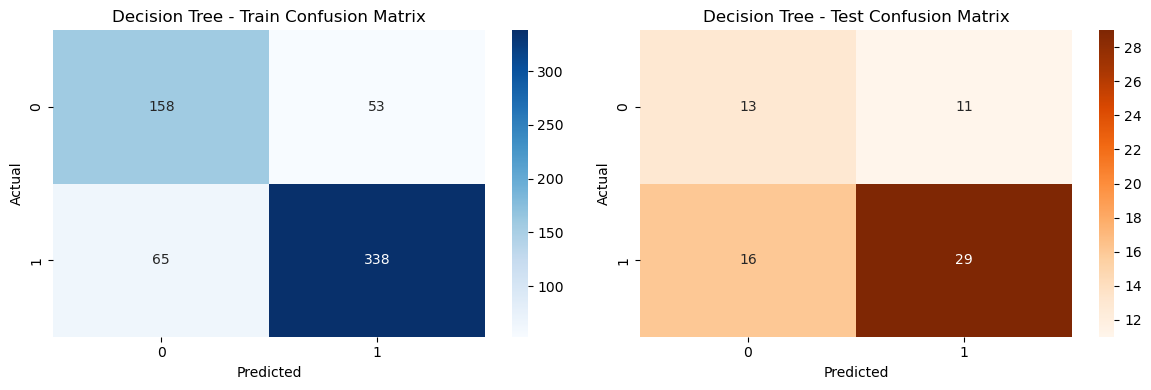


====== Random Forest ======
[Train] Accuracy: 0.8713
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.69      0.79       211
           1       0.86      0.97      0.91       403

    accuracy                           0.87       614
   macro avg       0.88      0.83      0.85       614
weighted avg       0.88      0.87      0.87       614

[Test] Accuracy: 0.6957
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.25      0.36        24
           1       0.70      0.93      0.80        45

    accuracy                           0.70        69
   macro avg       0.68      0.59      0.58        69
weighted avg       0.69      0.70      0.65        69



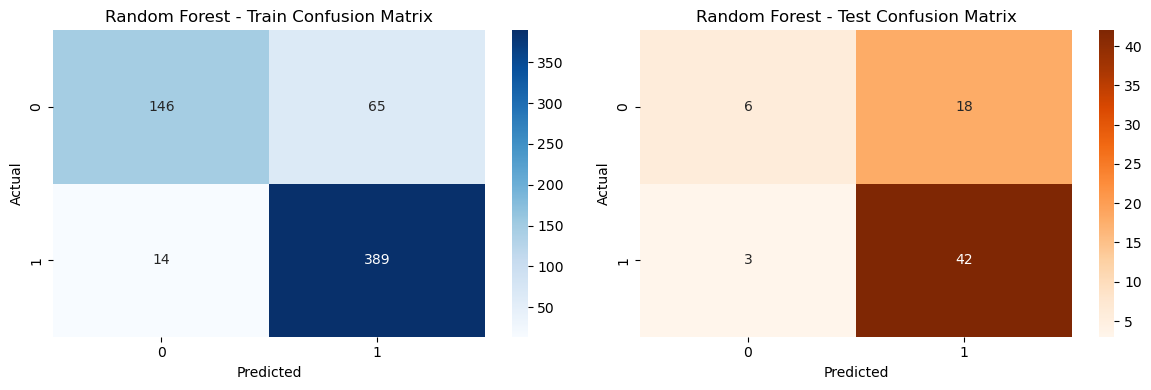

,Logistic Regression,Naive Bayes,KNN,SVM,Decision Tree,Random Forest
0,0.666667,0.623188,0.652174,0.768116,0.608696,0.695652


In [74]:
nums = [1000]
results = []

for num in nums:
    print(f"num_keywords: {num}")
    result = main(
        companyname="夏都",
        test_size=0.1,
        run_PCA=True, 
        PCA_n_components=0.8, 
        num_keywords=num, 
        keyword_method="frequency",
        final_data_method="contain"
    )
    results.append(result)
    print("=========================================")

df = pd.DataFrame(results)
df

num_keywords: 1000
running models for 龍德造船...
creating cleaned df...
creating df_listed_selected...
updating mark...
creating keywords...
creating final data...


Checking keyword containment: 100%|██████████| 500/500 [00:00<00:00, 2206.88it/s]


running models...
PCA reduced the feature count from 500 to 107

====== Logistic Regression ======
[Train] Accuracy: 0.7448
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       331
           1       0.77      0.72      0.74       343

    accuracy                           0.74       674
   macro avg       0.75      0.75      0.74       674
weighted avg       0.75      0.74      0.74       674

[Test] Accuracy: 0.5600
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56        34
           1       0.62      0.51      0.56        41

    accuracy                           0.56        75
   macro avg       0.56      0.56      0.56        75
weighted avg       0.57      0.56      0.56        75



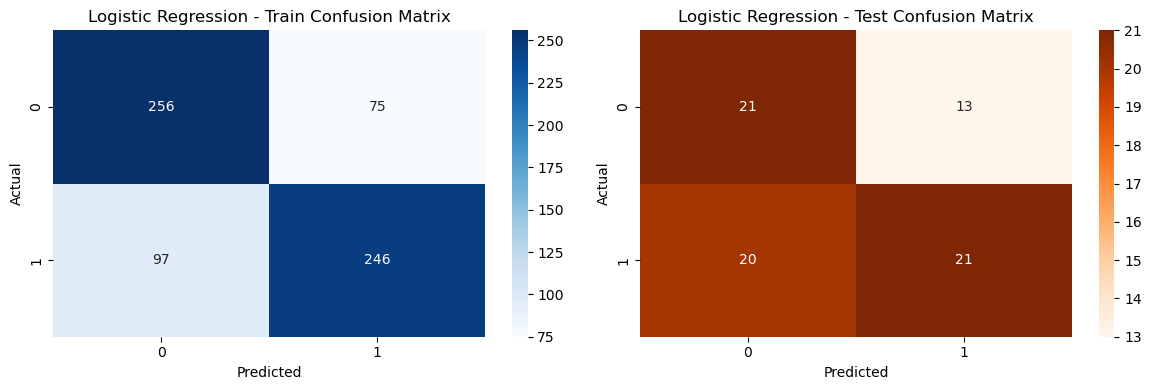


====== Naive Bayes ======
[Train] Accuracy: 0.6335
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.32      0.46       331
           1       0.59      0.94      0.72       343

    accuracy                           0.63       674
   macro avg       0.71      0.63      0.59       674
weighted avg       0.71      0.63      0.59       674

[Test] Accuracy: 0.5333
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.15      0.22        34
           1       0.55      0.85      0.67        41

    accuracy                           0.53        75
   macro avg       0.50      0.50      0.44        75
weighted avg       0.51      0.53      0.47        75



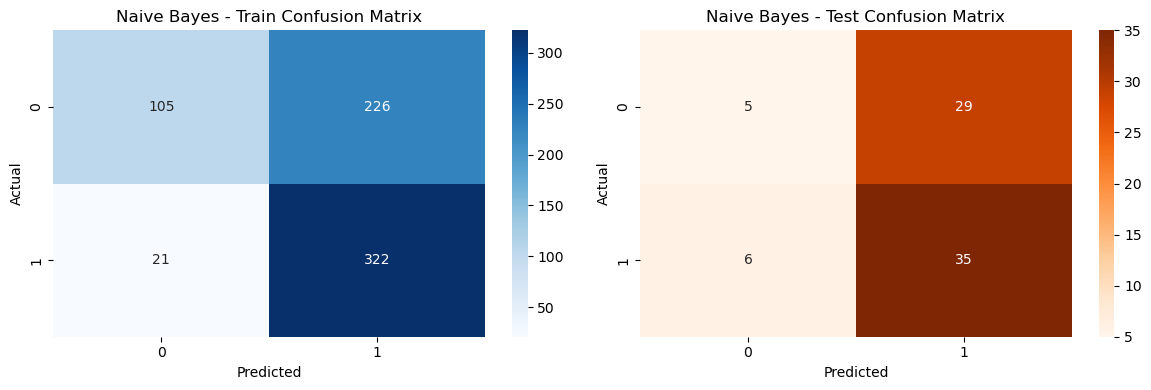


====== KNN ======
[Train] Accuracy: 0.7507
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       331
           1       0.75      0.76      0.76       343

    accuracy                           0.75       674
   macro avg       0.75      0.75      0.75       674
weighted avg       0.75      0.75      0.75       674

[Test] Accuracy: 0.5333
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.71      0.58        34
           1       0.62      0.39      0.48        41

    accuracy                           0.53        75
   macro avg       0.55      0.55      0.53        75
weighted avg       0.56      0.53      0.52        75



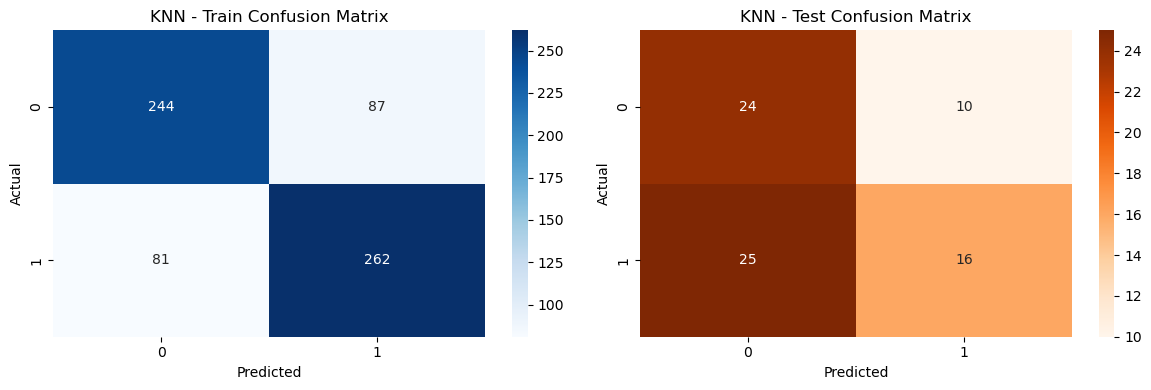


====== SVM ======
[Train] Accuracy: 0.8709
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       331
           1       0.92      0.82      0.87       343

    accuracy                           0.87       674
   macro avg       0.88      0.87      0.87       674
weighted avg       0.88      0.87      0.87       674

[Test] Accuracy: 0.5200
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.68      0.56        34
           1       0.59      0.39      0.47        41

    accuracy                           0.52        75
   macro avg       0.54      0.53      0.52        75
weighted avg       0.54      0.52      0.51        75



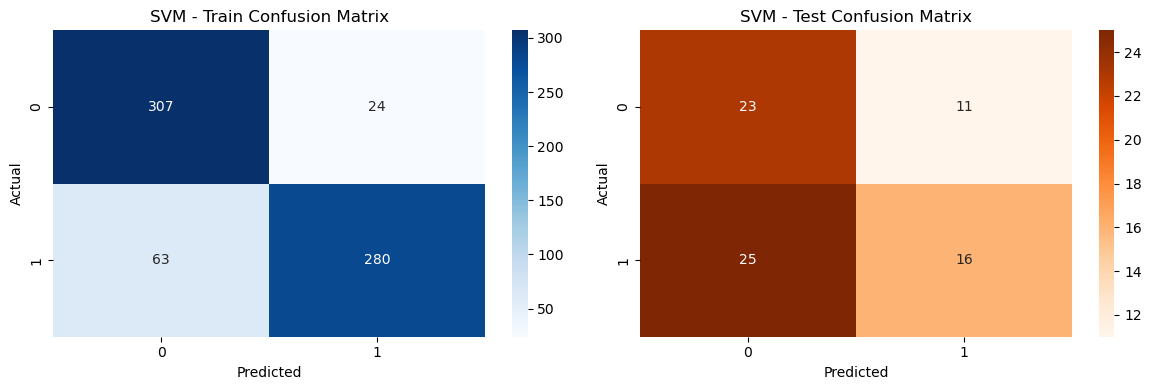


====== Decision Tree ======
[Train] Accuracy: 0.9496
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       331
           1       0.98      0.92      0.95       343

    accuracy                           0.95       674
   macro avg       0.95      0.95      0.95       674
weighted avg       0.95      0.95      0.95       674

[Test] Accuracy: 0.5200
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.53      0.50        34
           1       0.57      0.51      0.54        41

    accuracy                           0.52        75
   macro avg       0.52      0.52      0.52        75
weighted avg       0.53      0.52      0.52        75



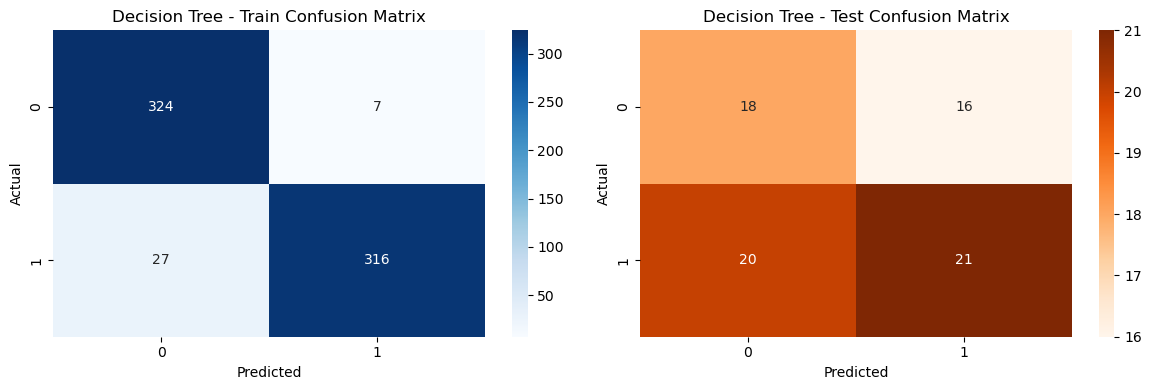


====== Random Forest ======
[Train] Accuracy: 0.9911
[Train] Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       1.00      0.98      0.99       343

    accuracy                           0.99       674
   macro avg       0.99      0.99      0.99       674
weighted avg       0.99      0.99      0.99       674

[Test] Accuracy: 0.5200
[Test] Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.59      0.53        34
           1       0.58      0.46      0.51        41

    accuracy                           0.52        75
   macro avg       0.53      0.53      0.52        75
weighted avg       0.53      0.52      0.52        75



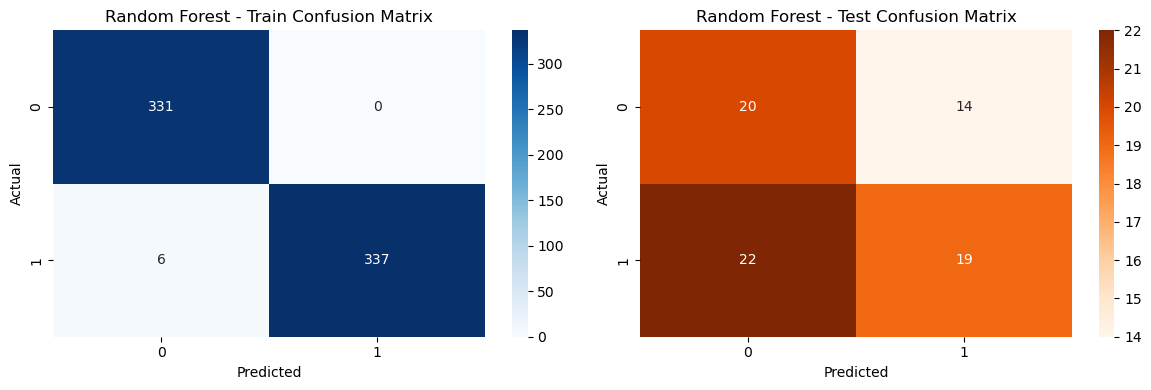

,Logistic Regression,Naive Bayes,KNN,SVM,Decision Tree,Random Forest
0,0.56,0.533333,0.533333,0.52,0.52,0.52


In [76]:
nums = [1000]
results = []

for num in nums:
    print(f"num_keywords: {num}")
    result = main(
        companyname="龍德造船",
        test_size=0.1,
        run_PCA=True, 
        PCA_n_components=0.8, 
        num_keywords=num, 
        keyword_method="frequency",
        final_data_method="contain"
    )
    results.append(result)
    print("=========================================")

df = pd.DataFrame(results)
df